# First, loading the required libraries and the dataset.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read data from csv file
data = pd.read_csv('D:\HE_HE\DATA_CURRENCY.csv', parse_dates=['Date'], index_col=0)
data

,Date,O Error!pen,High,Low,Close,Volume,Currency
265,2018-08-01,0.162754,0.162754USD,0.155134,0.159747,9670310.0,USD
266,2018-08-02,0.159990,0.162957USD,0.153122,0.153436,17144800.0,USD
267,2018-08-03,0.153542,0.153542USD,0.147170,0.151513,19982400.0,USD
268,2018-08-04,0.151436,0.153444USD,0.142764,0.145128,9886410.0,USD
269,2018-08-05,0.145062,0.147467USD,0.143080,0.146821,6728400.0,USD
...,...,...,...,...,...,...,...
1743,2022-08-18,0.050358,0.050928USD,0.048398,0.048658,8823068.0,USD
1744,2022-08-19,0.048657,0.04868USD,0.043831,0.045229,16962724.0,USD
1745,2022-08-20,0.045205,0.046741USD,0.044041,0.045210,7874064.0,USD
1746,2022-08-21,0.045201,0.046792USD,0.044611,0.046319,5919718.0,USD


# After loading the libraries and dataset, we can clean and optimize the dataset by removing any missing or duplicate values, and converting the date column to datetime format

In [2]:
# Cleaning the dataset
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

In [3]:
data.rename(columns={'Unnamed: 0':'Unnamed','O  Error!pen':'Open'})

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-08-01,0.162754,0.162754USD,0.155134,0.159747,9670310.0,USD
2018-08-02,0.159990,0.162957USD,0.153122,0.153436,17144800.0,USD
2018-08-03,0.153542,0.153542USD,0.147170,0.151513,19982400.0,USD
2018-08-04,0.151436,0.153444USD,0.142764,0.145128,9886410.0,USD
2018-08-05,0.145062,0.147467USD,0.143080,0.146821,6728400.0,USD
...,...,...,...,...,...,...
2022-08-18,0.050358,0.050928USD,0.048398,0.048658,8823068.0,USD
2022-08-19,0.048657,0.04868USD,0.043831,0.045229,16962724.0,USD
2022-08-20,0.045205,0.046741USD,0.044041,0.045210,7874064.0,USD


In [4]:
data['High'] = data['High'].str.replace('USD', '').astype('object')

In [5]:
data[['High','Low','Close','Volume','Currency']].head()

,High,Low,Close,Volume,Currency
Date,,,,,
2018-08-01,0.162754,0.155134,0.159747,9670310.0,USD
2018-08-02,0.162957,0.153122,0.153436,17144800.0,USD
2018-08-03,0.153542,0.147170,0.151513,19982400.0,USD
2018-08-04,0.153444,0.142764,0.145128,9886410.0,USD
2018-08-05,0.147467,0.143080,0.146821,6728400.0,USD


# Next, we can generate a plot to illustrate the time variation of the financial time series.

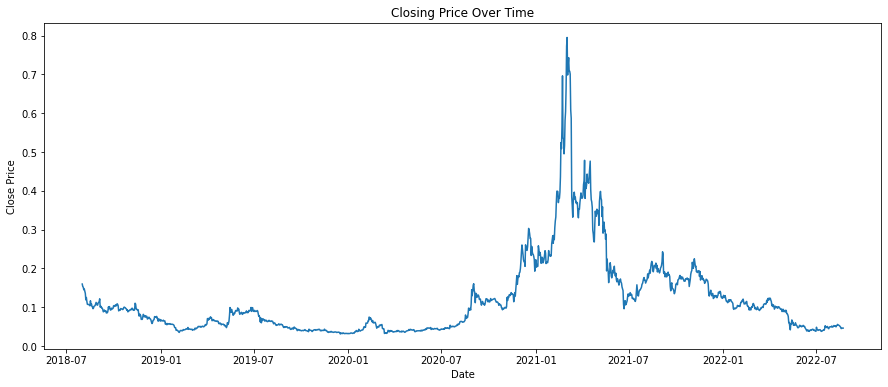

In [6]:
# Generate plot to illustrate time variation of y
plt.figure(figsize=(15,6))
plt.plot(data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.8781980209458458
p-value: 0.34238592234139464
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -10.293415998951916
p-value: 3.521529988858992e-18
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


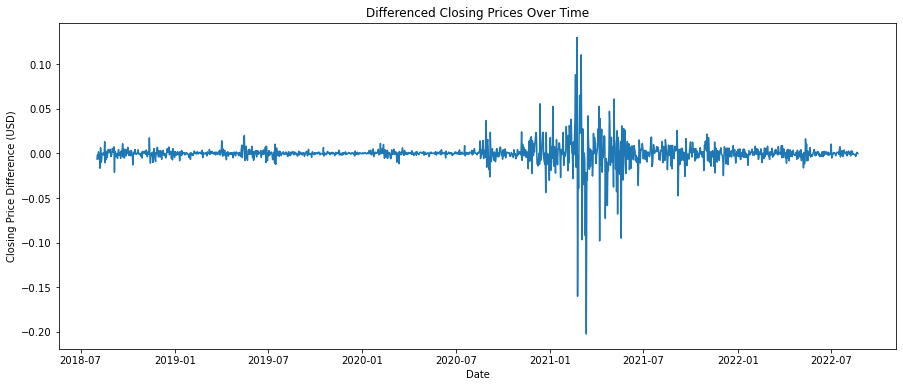

In [9]:
# Take the first difference of the 'Close' column
plt.figure(figsize=(15, 6))
data['Close_diff'] = data['Close'].diff()
# Create a timeseries plot of the differenced data
plt.plot(data['Close_diff'])
plt.xlabel('Date')
plt.ylabel('Closing Price Difference (USD)')
plt.title('Differenced Closing Prices Over Time')
plt.show()

# Then, we can estimate the autocorrelation function (ACF) and partial autocorrelation function (PACF) for the financial time series

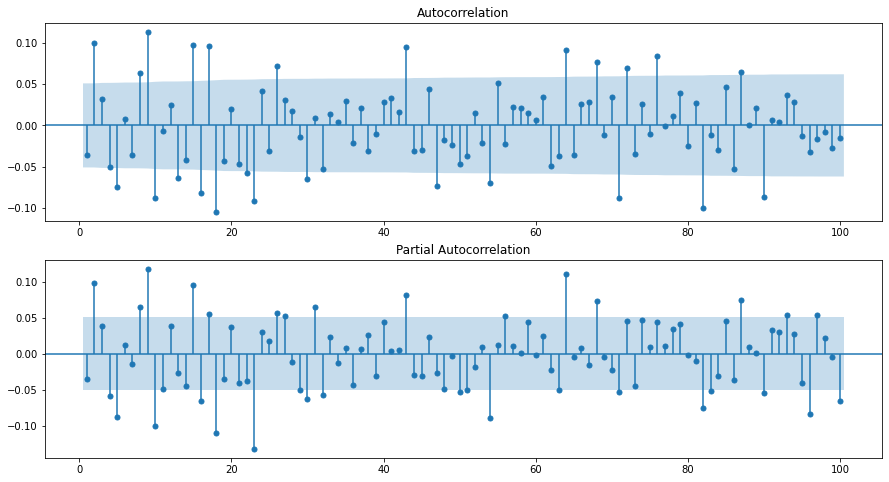

In [10]:
# Generate ACF and PACF plots for the differenced 'Close' column
fig, (ax1,ax2) = plt.subplots(2, figsize=(15,8))
plot_acf(data['Close_diff'].dropna(), lags=100, zero=False, ax=ax1)
plot_pacf(data['Close_diff'].dropna(),lags=100, zero=False, ax=ax2)
plt.show()


# After estimating the ACF and PACF, we can estimate the AR(p) model for p=1,2,3,4; and the ARMA(p,q) model for p=1,2 q=1,2, and summarise the results in a table with one column for each model, including the AIC and BIC estimates.# After estimating the ACF and PACF, we can estimate the AR(p) model for p=1,2,3,4; and the ARMA(p,q) model for p=1,2 q=1,2, and summarise the results in a table with one column for each model, including the AIC and BIC estimates.

In [11]:
# Estimate AR(p) and ARMA(p,q) models and summarise results in a table
models = []
for p in range(1,5):
    ar_model = ARIMA(data['Close_diff'], order=(p,0,0))
    ar_results = ar_model.fit()
    models.append(['AR({})'.format(p), ar_results.aic, ar_results.bic])

for p in range(1,3):
    for q in range(1,3):
        arma_model = SARIMAX(data['Close_diff'], order=(p,0,q))
        arma_results = arma_model.fit()
        models.append(['ARMA({},{})'.format(p,q), arma_results.aic, arma_results.bic])

table = pd.DataFrame(models, columns=['Model', 'AIC', 'BIC'])
print(table)

C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

       Model          AIC          BIC
0      AR(1) -8559.554984 -8543.649517
1      AR(2) -8572.011508 -8550.804219
2      AR(3) -8572.232672 -8545.723560
3      AR(4) -8575.290597 -8543.479663
4  ARMA(1,1) -8559.200793 -8543.295326
5  ARMA(1,2) -8572.030006 -8550.822716
6  ARMA(2,1) -8569.771318 -8548.564028
7  ARMA(2,2) -8603.908674 -8577.399563


C:\ANA\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Finally, we can fit the selected model to the data and generate forecasts for future time periods

In [12]:
data.reset_index('Date', inplace=True)

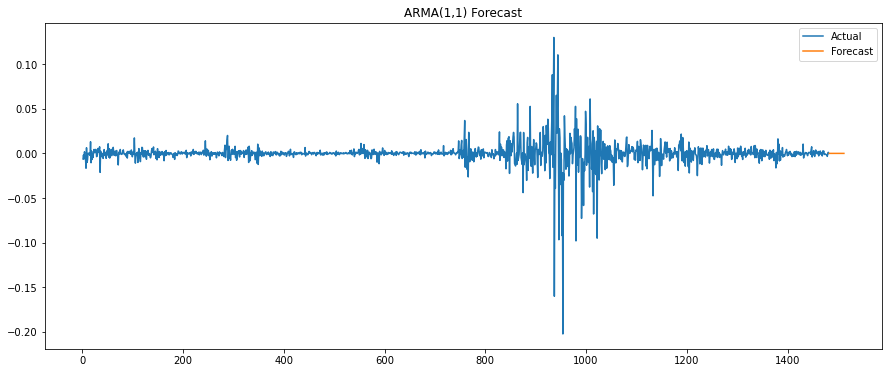

In [13]:
# Fit ARMA(1,1) model
model = ARIMA(data['Close_diff'], order=(1, 0, 1))
results = model.fit()

# Generate forecasts for the next 30 time periods
forecasts = results.forecast(steps=30)

# Plot actual and forecasted values
plt.figure(figsize=(15,6))
plt.plot(data['Close_diff'], label='Actual')
plt.plot(forecasts, label='Forecast')
plt.title('ARMA(1,1) Forecast')
plt.legend()
plt.show()

In [14]:
model = ARIMA(data['Close_diff'].diff().dropna(), order=(1, 0, 1))
fit = model.fit()
forecast = fit.get_forecast(steps=5)
forecast_values = forecast.predicted_mean
forecast_values.index = pd.date_range(start='2022-08-24', periods=5, freq='MS')
forecast_values


C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ANA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2022-09-01   -0.000348
2022-10-01    0.000101
2022-11-01   -0.000029
2022-12-01    0.000008
2023-01-01   -0.000002
Freq: MS, Name: predicted_mean, dtype: float64